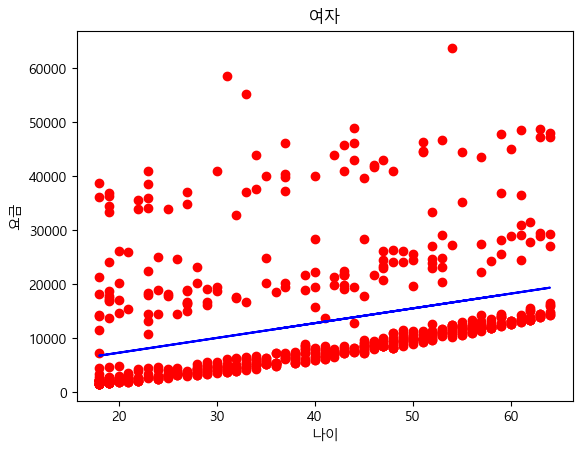

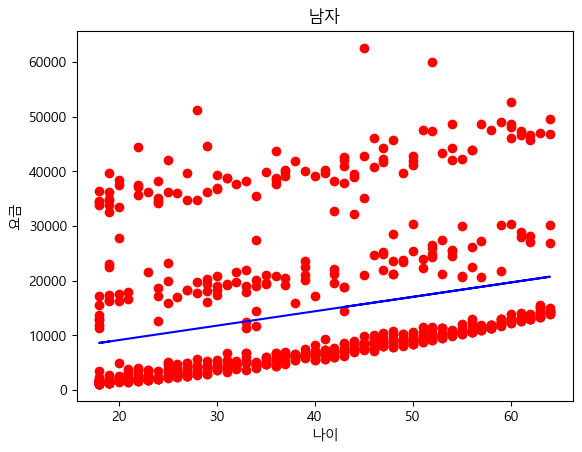

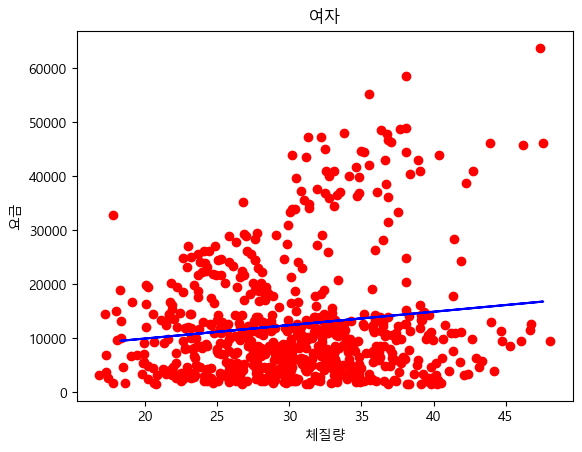

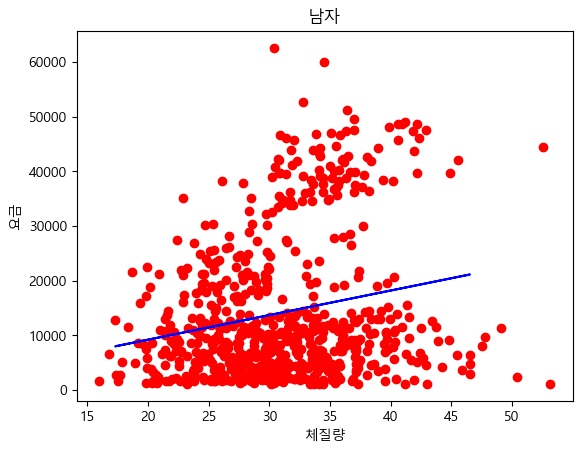

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def train_and_predict(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return X_test, y_test, y_pred

def plot_results(X, y, X_test, y_pred, xlabel, ylabel, title):
    plt.scatter(X, y, color='red')  
    plt.plot(X_test, y_pred, color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

insurance = pd.read_csv("./insurance.csv")
sex = insurance['sex']
male = insurance[sex == 'male']
female = insurance[sex == 'female']

X_male_age = male[['age']]
y_male = male['charges']
X_female_age = female[['age']]
y_female = female['charges']

# 여자 나이 vs 요금
X_test_f, y_test_f, y_pred_female = train_and_predict(X_female_age, y_female)
plot_results(X_female_age, y_female, X_test_f, y_pred_female, '나이', '요금', '여자')

# 남자 나이 vs 요금
X_test_m, y_test_m, y_pred_male = train_and_predict(X_male_age, y_male)
plot_results(X_male_age, y_male, X_test_m, y_pred_male, '나이', '요금', '남자')

X_male_BMI = male[['bmi']]
X_female_BMI = female[['bmi']]

# 여자 체질량 vs 요금
X_test_f, y_test_f, y_pred_female = train_and_predict(X_female_BMI, y_female)
plot_results(X_female_BMI, y_female, X_test_f, y_pred_female, '체질량', '요금', '여자')

# 남자 체질량 vs 요금
X_test_m, y_test_m, y_pred_male = train_and_predict(X_male_BMI, y_male)
plot_results(X_male_BMI, y_male, X_test_m, y_pred_male, '체질량', '요금', '남자')


In [43]:
import pandas as pd
# Pandas Data 읽기맨위컬럼의값을을 col_names으로 정하기
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin','bmi', 'pedigree', 
'age', 'label']

#Pandas로 데이터 읽고 각 컬럼별 속성을 col_name으로 설정하기 정하기 
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
feature_cols = ['pregnant', 'insulin','bmi','age','glucose','bp','pedigree']
pima=pima[1:]

X = pima[feature_cols] # Features
y = pima.label # Target variable

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=kf)

conf = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf.ravel()

# 결과 출력
print(f"Confusion Matrix: \n{conf}")
print(f"TP: {tp}")
print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")

# 정밀도, 재현율 등 
print(classification_report(y, y_pred))

# 전체적으로 당뇨가 아닌 경우를 당뇨인 경우보다 더 잘 예측한다.
# 특히 재현율 즉 실제 당뇨병 환자를 모델이 잘 예측하지 못하기에 f1-score도 낮게 나온다.
# 결과적으로 당뇨병 환자에 대한 재현율을 높이기 위해 균형 데이터나 모델 튜닝이 필요하다.

Confusion Matrix: 
[[440  60]
 [115 153]]
TP: 153
TN: 440
FP: 60
FN: 115
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gudtj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st